# 03. Сравнение моделей машинного обучения
**Цель**: Сравнение алгоритмов машинного обучения для прогнозирования спроса.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
from src.models.baseline_models import BaselineModels
from src.models.lgbm_model import LGBMModel
from config.settings import DATA_PATH, REPORTS_PATH

# Настройки отображения
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")
pd.set_option("display.float_format", "{:.3f}".format)

In [3]:
# 1. Загрузка подготовленных данных
print("\n1. Загрузка данных...")
df = pd.read_csv(DATA_PATH / "processed/final_dataset.csv")
print(f"Загружено: {len(df)} записей, {df.shape[1]} признаков")


1. Загрузка данных...
Загружено: 785695 записей, 78 признаков


In [4]:
# 2. Анализ базовых моделей
print("\n2. Анализ baseline моделей...")
baseline_analyzer = BaselineModels()
baseline_results = baseline_analyzer.run_complete_analysis()


2. Анализ baseline моделей...
Загрузка данных для анализа базовых моделей...
Разделение данных на обучающую и тестовую выборки...
Обучение и оценка базовых моделей...
Начало обучения базовых моделей
Обучающая выборка: 627622 samples, 77 features
Тестовая выборка: 158073 samples

--- Обучение модели: LinearRegression ---
Модель LinearRegression обучена за 2.05 секунд
Метрики - MAE: 849.28, RMSE: 1248.67, MAPE: 12.69%

--- Обучение модели: RandomForest ---
Модель RandomForest обучена за 212.68 секунд
Метрики - MAE: 665.49, RMSE: 980.14, MAPE: 9.79%

--- Обучение модели: MeanBaseline ---


C:\Users\lunar\PycharmProjects\demand_forecasting\src\models\base_model.py:143: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(y_pred, residuals, 1)


Модель MeanBaseline обучена за 0.02 секунд
Метрики - MAE: 2326.07, RMSE: 3237.77, MAPE: 36.28%
Результаты сохранены:
- Детальные метрики: C:\Users\lunar\PycharmProjects\demand_forecasting\reports\baseline_models_results.csv
- Сводный отчет: C:\Users\lunar\PycharmProjects\demand_forecasting\reports\baseline_models_summary.json

СВОДНЫЙ ОТЧЕТ ПО БАЗОВЫМ МОДЕЛЯМ
Лучшая модель: RandomForest (MAPE: 9.79%)
Худшая модель: MeanBaseline (MAPE: 36.28%)
Общее время обучения: 214.75 секунд

Детальные результаты
LinearRegression:
MAPE: 12.686477%
MAE: 849.280406
RMSE: 1248.671351
R²: 0.8485
Время обучения: 2.05 сек

RandomForest:
MAPE: 9.786255%
MAE: 665.486362
RMSE: 980.142707
R²: 0.9066
Время обучения: 212.68 сек

MeanBaseline:
MAPE: 36.281285%
MAE: 2326.074477
RMSE: 3237.773800
R²: -0.0189
Время обучения: 0.02 сек



In [5]:
# 3. Обучение LightGBM модели
print("\n3. Обучение LightGBM модели...")
lgbm_model = LGBMModel()
lgbm_metrics, lgbm_predictions = lgbm_model.run_complete_training()


3. Обучение LightGBM модели...


[I 2026-02-09 23:02:54,564] A new study created in memory with name: no-name-29ca35b5-9931-469f-9e0d-6e03c218eb4a
Best trial: 0. Best value: 8.94227:   1%|          | 1/100 [02:03<3:24:31, 123.95s/it]

[I 2026-02-09 23:04:58,516] Trial 0 finished with value: 8.942268751196204 and parameters: {'lambda_l1': 2.348881295853308e-05, 'lambda_l2': 3.6010467344475403, 'num_leaves': 102, 'max_depth': 8, 'min_data_in_leaf': 120, 'feature_fraction': 0.5701975341512912, 'bagging_fraction': 0.5261376254756898, 'bagging_freq': 7, 'min_child_samples': 98, 'min_child_weight': 0.1771884735480681, 'learning_rate': 0.005318033256270142, 'max_bin': 491, 'extra_trees': True, 'path_smooth': 1.8182496720710062}. Best is trial 0 with value: 8.942268751196204.


Best trial: 1. Best value: 8.17565:   2%|▏         | 2/100 [03:18<2:34:33, 94.62s/it] 

[I 2026-02-09 23:06:12,611] Trial 1 finished with value: 8.175650624820994 and parameters: {'lambda_l1': 4.4734294104626844e-07, 'lambda_l2': 5.472429642032198e-06, 'num_leaves': 81, 'max_depth': 7, 'min_data_in_leaf': 181, 'feature_fraction': 0.7753338026250707, 'bagging_fraction': 0.5627722372934189, 'bagging_freq': 3, 'min_child_samples': 67, 'min_child_weight': 0.0054502936945582505, 'learning_rate': 0.05254210669345883, 'max_bin': 260, 'extra_trees': False, 'path_smooth': 0.46450412719997725}. Best is trial 1 with value: 8.175650624820994.


Best trial: 1. Best value: 8.17565:   3%|▎         | 3/100 [04:54<2:34:33, 95.61s/it]

[I 2026-02-09 23:07:49,390] Trial 2 finished with value: 8.68520388359072 and parameters: {'lambda_l1': 0.0029369981104377003, 'lambda_l2': 3.425445902633376e-07, 'num_leaves': 37, 'max_depth': 10, 'min_data_in_leaf': 485, 'feature_fraction': 0.8637788066524075, 'bagging_fraction': 0.6370761961280168, 'bagging_freq': 1, 'min_child_samples': 109, 'min_child_weight': 0.004374364439939076, 'learning_rate': 0.007206848764305203, 'max_bin': 349, 'extra_trees': False, 'path_smooth': 2.587799816000169}. Best is trial 1 with value: 8.175650624820994.


Best trial: 1. Best value: 8.17565:   4%|▍         | 4/100 [06:22<2:28:07, 92.58s/it]

[I 2026-02-09 23:09:17,323] Trial 3 finished with value: 8.291905439997592 and parameters: {'lambda_l1': 0.009176996354542699, 'lambda_l2': 6.388511557344611e-06, 'num_leaves': 81, 'max_depth': 7, 'min_data_in_leaf': 133, 'feature_fraction': 0.9363130824940513, 'bagging_fraction': 0.8488097705125015, 'bagging_freq': 7, 'min_child_samples': 137, 'min_child_weight': 0.038672288491177424, 'learning_rate': 0.07913270952323785, 'max_bin': 226, 'extra_trees': True, 'path_smooth': 3.2533033076326436}. Best is trial 1 with value: 8.175650624820994.


Best trial: 1. Best value: 8.17565:   5%|▌         | 5/100 [07:24<2:09:13, 81.61s/it]

[I 2026-02-09 23:10:19,485] Trial 4 finished with value: 8.246484600838167 and parameters: {'lambda_l1': 3.148441347423712e-05, 'lambda_l2': 2.7678419414850017e-06, 'num_leaves': 111, 'max_depth': 6, 'min_data_in_leaf': 176, 'feature_fraction': 0.7442132374212118, 'bagging_fraction': 0.5634159012386432, 'bagging_freq': 6, 'min_child_samples': 29, 'min_child_weight': 8.342988013047341, 'learning_rate': 0.05054562991054155, 'max_bin': 259, 'extra_trees': False, 'path_smooth': 7.068573438476172}. Best is trial 1 with value: 8.175650624820994.


Best trial: 1. Best value: 8.17565:   6%|▌         | 6/100 [09:01<2:16:05, 86.87s/it]

[I 2026-02-09 23:11:56,563] Trial 5 finished with value: 8.458887063945879 and parameters: {'lambda_l1': 0.03639690979811287, 'lambda_l2': 0.08738424135626986, 'num_leaves': 38, 'max_depth': 6, 'min_data_in_leaf': 102, 'feature_fraction': 0.888396541644017, 'bagging_fraction': 0.780484157072401, 'bagging_freq': 3, 'min_child_samples': 28, 'min_child_weight': 0.0007343344964174934, 'learning_rate': 0.01324473460368133, 'max_bin': 419, 'extra_trees': False, 'path_smooth': 4.722149251619493}. Best is trial 1 with value: 8.175650624820994.


Best trial: 1. Best value: 8.17565:   7%|▋         | 7/100 [11:03<2:32:08, 98.16s/it]

[I 2026-02-09 23:13:57,964] Trial 6 finished with value: 8.743415512155071 and parameters: {'lambda_l1': 1.1921975182604538e-07, 'lambda_l2': 0.02625445968759339, 'num_leaves': 104, 'max_depth': 7, 'min_data_in_leaf': 397, 'feature_fraction': 0.7222080183639759, 'bagging_fraction': 0.7352297732218973, 'bagging_freq': 3, 'min_child_samples': 23, 'min_child_weight': 4.4396482429275246e-05, 'learning_rate': 0.005493641531789704, 'max_bin': 391, 'extra_trees': False, 'path_smooth': 9.07566473926093}. Best is trial 1 with value: 8.175650624820994.


Best trial: 1. Best value: 8.17565:   8%|▊         | 8/100 [12:05<2:12:50, 86.64s/it]

[I 2026-02-09 23:14:59,937] Trial 7 finished with value: 8.317164120777566 and parameters: {'lambda_l1': 1.7523871598466864e-06, 'lambda_l2': 4.9368087974032924e-05, 'num_leaves': 104, 'max_depth': 5, 'min_data_in_leaf': 84, 'feature_fraction': 0.6303881538111956, 'bagging_fraction': 0.5725495792643019, 'bagging_freq': 7, 'min_child_samples': 125, 'min_child_weight': 0.06315715218918058, 'learning_rate': 0.06804032387540251, 'max_bin': 441, 'extra_trees': False, 'path_smooth': 5.393422419156507}. Best is trial 1 with value: 8.175650624820994.


Best trial: 1. Best value: 8.17565:   9%|▉         | 9/100 [13:12<2:01:57, 80.41s/it]

[I 2026-02-09 23:16:06,665] Trial 8 finished with value: 8.737249542517272 and parameters: {'lambda_l1': 0.18491042486838075, 'lambda_l2': 1.16097187606918, 'num_leaves': 61, 'max_depth': 4, 'min_data_in_leaf': 152, 'feature_fraction': 0.6921985048818153, 'bagging_fraction': 0.8681066446651219, 'bagging_freq': 7, 'min_child_samples': 20, 'min_child_weight': 0.011600689839007137, 'learning_rate': 0.017459597996718097, 'max_bin': 266, 'extra_trees': False, 'path_smooth': 9.429097039125192}. Best is trial 1 with value: 8.175650624820994.


Best trial: 1. Best value: 8.17565:  10%|█         | 10/100 [14:46<2:06:52, 84.59s/it]

[I 2026-02-09 23:17:40,601] Trial 9 finished with value: 9.316998005609864 and parameters: {'lambda_l1': 8.106369361161699e-06, 'lambda_l2': 0.0004667836070663388, 'num_leaves': 99, 'max_depth': 6, 'min_data_in_leaf': 488, 'feature_fraction': 0.93310128272395, 'bagging_fraction': 0.6133020331214138, 'bagging_freq': 4, 'min_child_samples': 59, 'min_child_weight': 0.0005117324605095927, 'learning_rate': 0.005584200835727969, 'max_bin': 383, 'extra_trees': True, 'path_smooth': 2.7864646423661146}. Best is trial 1 with value: 8.175650624820994.


Best trial: 1. Best value: 8.17565:  11%|█         | 11/100 [16:25<2:12:06, 89.06s/it]

[I 2026-02-09 23:19:19,815] Trial 10 finished with value: 8.343899492945576 and parameters: {'lambda_l1': 1.611798337203683e-08, 'lambda_l2': 1.1323342574942026e-08, 'num_leaves': 125, 'max_depth': 9, 'min_data_in_leaf': 262, 'feature_fraction': 0.8064678510137326, 'bagging_fraction': 0.6625903983988142, 'bagging_freq': 1, 'min_child_samples': 68, 'min_child_weight': 1.185405716882291e-05, 'learning_rate': 0.0324813367195978, 'max_bin': 320, 'extra_trees': True, 'path_smooth': 0.5176575624547732}. Best is trial 1 with value: 8.175650624820994.


Best trial: 1. Best value: 8.17565:  12%|█▏        | 12/100 [17:28<1:58:54, 81.07s/it]

[I 2026-02-09 23:20:22,595] Trial 11 finished with value: 8.309501013705226 and parameters: {'lambda_l1': 0.000179649519485956, 'lambda_l2': 1.4474355941917368e-06, 'num_leaves': 127, 'max_depth': 6, 'min_data_in_leaf': 238, 'feature_fraction': 0.7906353983164585, 'bagging_fraction': 0.5300998580217439, 'bagging_freq': 5, 'min_child_samples': 51, 'min_child_weight': 3.335596131055716, 'learning_rate': 0.04085108283175784, 'max_bin': 271, 'extra_trees': False, 'path_smooth': 7.119778022134119}. Best is trial 1 with value: 8.175650624820994.


Best trial: 12. Best value: 8.14699:  13%|█▎        | 13/100 [18:47<1:56:58, 80.67s/it]

[I 2026-02-09 23:21:42,339] Trial 12 finished with value: 8.146990712390078 and parameters: {'lambda_l1': 5.092468498619414, 'lambda_l2': 0.00043125458575778326, 'num_leaves': 73, 'max_depth': 8, 'min_data_in_leaf': 210, 'feature_fraction': 0.7827948583939727, 'bagging_fraction': 0.6804301863569198, 'bagging_freq': 5, 'min_child_samples': 74, 'min_child_weight': 6.194805516104719, 'learning_rate': 0.046843172037118005, 'max_bin': 201, 'extra_trees': False, 'path_smooth': 7.304654997909493}. Best is trial 12 with value: 8.146990712390078.


Best trial: 12. Best value: 8.14699:  14%|█▍        | 14/100 [19:54<1:49:35, 76.46s/it]

[I 2026-02-09 23:22:49,089] Trial 13 finished with value: 8.171764323789008 and parameters: {'lambda_l1': 5.111730313232058, 'lambda_l2': 0.0009411849283556647, 'num_leaves': 74, 'max_depth': 8, 'min_data_in_leaf': 334, 'feature_fraction': 0.8029815659000404, 'bagging_fraction': 0.676080159453643, 'bagging_freq': 3, 'min_child_samples': 80, 'min_child_weight': 0.44769965408526574, 'learning_rate': 0.0995265856001793, 'max_bin': 211, 'extra_trees': False, 'path_smooth': 0.08774776051208344}. Best is trial 12 with value: 8.146990712390078.


Best trial: 12. Best value: 8.14699:  15%|█▌        | 15/100 [21:04<1:45:39, 74.58s/it]

[I 2026-02-09 23:23:59,305] Trial 14 finished with value: 8.158193268210038 and parameters: {'lambda_l1': 8.302947847970373, 'lambda_l2': 0.0014382585207434455, 'num_leaves': 62, 'max_depth': 9, 'min_data_in_leaf': 346, 'feature_fraction': 0.8418593395191809, 'bagging_fraction': 0.7024484206997886, 'bagging_freq': 5, 'min_child_samples': 92, 'min_child_weight': 0.8195182504116162, 'learning_rate': 0.08677114480236102, 'max_bin': 203, 'extra_trees': False, 'path_smooth': 7.392180105452861}. Best is trial 12 with value: 8.146990712390078.


Best trial: 15. Best value: 8.07728:  16%|█▌        | 16/100 [22:56<2:00:06, 85.80s/it]

[I 2026-02-09 23:25:51,149] Trial 15 finished with value: 8.077281235356391 and parameters: {'lambda_l1': 9.863872853607948, 'lambda_l2': 0.00672260703958366, 'num_leaves': 57, 'max_depth': 10, 'min_data_in_leaf': 333, 'feature_fraction': 0.5038473497587768, 'bagging_fraction': 0.7773836729072283, 'bagging_freq': 5, 'min_child_samples': 93, 'min_child_weight': 0.7841136674302288, 'learning_rate': 0.027243476912444647, 'max_bin': 201, 'extra_trees': False, 'path_smooth': 7.631481015709443}. Best is trial 15 with value: 8.077281235356391.


Best trial: 16. Best value: 8.0702:  17%|█▋        | 17/100 [25:13<2:19:46, 101.04s/it]

[I 2026-02-09 23:28:07,655] Trial 16 finished with value: 8.070204536487882 and parameters: {'lambda_l1': 0.5317639744099767, 'lambda_l2': 0.0346983104996687, 'num_leaves': 53, 'max_depth': 10, 'min_data_in_leaf': 309, 'feature_fraction': 0.5195106931655114, 'bagging_fraction': 0.9296417973607547, 'bagging_freq': 5, 'min_child_samples': 111, 'min_child_weight': 2.273240714039774, 'learning_rate': 0.027614138190643803, 'max_bin': 319, 'extra_trees': False, 'path_smooth': 8.544981348881738}. Best is trial 16 with value: 8.070204536487882.


Best trial: 16. Best value: 8.0702:  18%|█▊        | 18/100 [27:28<2:32:06, 111.30s/it]

[I 2026-02-09 23:30:22,842] Trial 17 finished with value: 8.073147083225432 and parameters: {'lambda_l1': 0.33413549522292596, 'lambda_l2': 0.02681612510468755, 'num_leaves': 54, 'max_depth': 10, 'min_data_in_leaf': 315, 'feature_fraction': 0.5002536853287183, 'bagging_fraction': 0.9436146026941503, 'bagging_freq': 4, 'min_child_samples': 114, 'min_child_weight': 1.0427587029600216, 'learning_rate': 0.02531433573784451, 'max_bin': 314, 'extra_trees': False, 'path_smooth': 8.459076925241899}. Best is trial 16 with value: 8.070204536487882.


Best trial: 16. Best value: 8.0702:  19%|█▉        | 19/100 [28:27<2:09:03, 95.60s/it] 

[I 2026-02-09 23:31:21,835] Trial 18 pruned. 


Best trial: 16. Best value: 8.0702:  20%|██        | 20/100 [30:05<2:08:41, 96.52s/it]

[I 2026-02-09 23:33:00,494] Trial 19 pruned. 


Best trial: 16. Best value: 8.0702:  21%|██        | 21/100 [32:01<2:14:41, 102.29s/it]

[I 2026-02-09 23:34:56,272] Trial 20 finished with value: 8.182317755826872 and parameters: {'lambda_l1': 0.2901995076939727, 'lambda_l2': 0.009886175784582233, 'num_leaves': 45, 'max_depth': 9, 'min_data_in_leaf': 399, 'feature_fraction': 0.5708568898712773, 'bagging_fraction': 0.8783899879469879, 'bagging_freq': 6, 'min_child_samples': 107, 'min_child_weight': 0.037698479461390405, 'learning_rate': 0.022441927968477014, 'max_bin': 363, 'extra_trees': False, 'path_smooth': 9.931649957015031}. Best is trial 16 with value: 8.070204536487882.


Best trial: 16. Best value: 8.0702:  22%|██▏       | 22/100 [34:04<2:21:07, 108.56s/it]

[I 2026-02-09 23:36:59,436] Trial 21 finished with value: 8.076734416005054 and parameters: {'lambda_l1': 0.5588242204335885, 'lambda_l2': 0.006620663475607146, 'num_leaves': 63, 'max_depth': 10, 'min_data_in_leaf': 307, 'feature_fraction': 0.5102958559158718, 'bagging_fraction': 0.8038718491177969, 'bagging_freq': 4, 'min_child_samples': 123, 'min_child_weight': 0.9758675447418146, 'learning_rate': 0.028228387778182085, 'max_bin': 299, 'extra_trees': False, 'path_smooth': 8.466183363146149}. Best is trial 16 with value: 8.070204536487882.


Best trial: 22. Best value: 8.06584:  23%|██▎       | 23/100 [36:02<2:22:49, 111.29s/it]

[I 2026-02-09 23:38:57,096] Trial 22 finished with value: 8.065838108792907 and parameters: {'lambda_l1': 0.03244417828518578, 'lambda_l2': 0.12136767407808043, 'num_leaves': 68, 'max_depth': 10, 'min_data_in_leaf': 275, 'feature_fraction': 0.6294252507223971, 'bagging_fraction': 0.9015585104094586, 'bagging_freq': 4, 'min_child_samples': 131, 'min_child_weight': 1.9626414201408195, 'learning_rate': 0.025897963362324593, 'max_bin': 303, 'extra_trees': False, 'path_smooth': 8.585819495807904}. Best is trial 22 with value: 8.065838108792907.


Best trial: 22. Best value: 8.06584:  24%|██▍       | 24/100 [37:38<2:15:17, 106.80s/it]

[I 2026-02-09 23:40:33,441] Trial 23 finished with value: 8.205851404570769 and parameters: {'lambda_l1': 0.026585995815949535, 'lambda_l2': 0.16837012456721206, 'num_leaves': 31, 'max_depth': 10, 'min_data_in_leaf': 266, 'feature_fraction': 0.6405286463537717, 'bagging_fraction': 0.901634941743132, 'bagging_freq': 4, 'min_child_samples': 145, 'min_child_weight': 2.613836473875608, 'learning_rate': 0.020987819749539293, 'max_bin': 284, 'extra_trees': False, 'path_smooth': 6.274370531920974}. Best is trial 22 with value: 8.065838108792907.


Best trial: 24. Best value: 8.0556:  25%|██▌       | 25/100 [39:29<2:14:59, 108.00s/it] 

[I 2026-02-09 23:42:24,219] Trial 24 finished with value: 8.055601376741038 and parameters: {'lambda_l1': 0.07243276707767483, 'lambda_l2': 0.041405229440655104, 'num_leaves': 88, 'max_depth': 9, 'min_data_in_leaf': 225, 'feature_fraction': 0.6184977782031033, 'bagging_fraction': 0.9119766686827682, 'bagging_freq': 6, 'min_child_samples': 136, 'min_child_weight': 0.26427064252487176, 'learning_rate': 0.032400575424046445, 'max_bin': 345, 'extra_trees': False, 'path_smooth': 8.300982703667614}. Best is trial 24 with value: 8.055601376741038.


Best trial: 24. Best value: 8.0556:  26%|██▌       | 26/100 [41:12<2:11:19, 106.48s/it]

[I 2026-02-09 23:44:07,168] Trial 25 finished with value: 8.068607114157206 and parameters: {'lambda_l1': 0.02965742617378349, 'lambda_l2': 0.7021527285724509, 'num_leaves': 89, 'max_depth': 9, 'min_data_in_leaf': 217, 'feature_fraction': 0.6340471318445113, 'bagging_fraction': 0.8312852076811093, 'bagging_freq': 6, 'min_child_samples': 132, 'min_child_weight': 0.21990030843195724, 'learning_rate': 0.03487243125654929, 'max_bin': 346, 'extra_trees': False, 'path_smooth': 6.292416804357829}. Best is trial 24 with value: 8.055601376741038.


Best trial: 24. Best value: 8.0556:  27%|██▋       | 27/100 [42:02<1:48:48, 89.43s/it] 

[I 2026-02-09 23:44:56,810] Trial 26 pruned. 


Best trial: 24. Best value: 8.0556:  28%|██▊       | 28/100 [43:41<1:50:57, 92.47s/it]

[I 2026-02-09 23:46:36,370] Trial 27 finished with value: 8.060697760867233 and parameters: {'lambda_l1': 0.05880854642462582, 'lambda_l2': 0.8366215104038839, 'num_leaves': 91, 'max_depth': 9, 'min_data_in_leaf': 241, 'feature_fraction': 0.605395421321985, 'bagging_fraction': 0.895567190575014, 'bagging_freq': 6, 'min_child_samples': 132, 'min_child_weight': 0.01565290173071742, 'learning_rate': 0.06423388314484108, 'max_bin': 376, 'extra_trees': False, 'path_smooth': 6.214456667401096}. Best is trial 24 with value: 8.055601376741038.


Best trial: 24. Best value: 8.0556:  29%|██▉       | 29/100 [44:51<1:41:20, 85.64s/it]

[I 2026-02-09 23:47:46,085] Trial 28 finished with value: 8.076929192166485 and parameters: {'lambda_l1': 0.00391060386288626, 'lambda_l2': 6.527286096908877e-05, 'num_leaves': 90, 'max_depth': 9, 'min_data_in_leaf': 60, 'feature_fraction': 0.680268402926331, 'bagging_fraction': 0.9049804630125432, 'bagging_freq': 6, 'min_child_samples': 141, 'min_child_weight': 0.017079847271640573, 'learning_rate': 0.062194587259339566, 'max_bin': 425, 'extra_trees': False, 'path_smooth': 6.357672896164052}. Best is trial 24 with value: 8.055601376741038.


Best trial: 24. Best value: 8.0556:  30%|███       | 30/100 [45:41<1:27:27, 74.96s/it]

[I 2026-02-09 23:48:36,125] Trial 29 pruned. 


Best trial: 24. Best value: 8.0556:  31%|███       | 31/100 [46:36<1:19:21, 69.00s/it]

[I 2026-02-09 23:49:31,219] Trial 30 pruned. 


Best trial: 24. Best value: 8.0556:  32%|███▏      | 32/100 [48:16<1:28:39, 78.23s/it]

[I 2026-02-09 23:51:10,987] Trial 31 finished with value: 8.091869770523287 and parameters: {'lambda_l1': 0.014763503669532678, 'lambda_l2': 0.5841456365212513, 'num_leaves': 88, 'max_depth': 9, 'min_data_in_leaf': 216, 'feature_fraction': 0.6767624566227105, 'bagging_fraction': 0.824581238004878, 'bagging_freq': 6, 'min_child_samples': 131, 'min_child_weight': 0.30065119089728815, 'learning_rate': 0.03918245782238918, 'max_bin': 395, 'extra_trees': False, 'path_smooth': 6.11386312052879}. Best is trial 24 with value: 8.055601376741038.


Best trial: 24. Best value: 8.0556:  33%|███▎      | 33/100 [50:19<1:42:19, 91.63s/it]

[I 2026-02-09 23:53:13,881] Trial 32 finished with value: 8.0571626524175 and parameters: {'lambda_l1': 0.002032953368169304, 'lambda_l2': 0.12260359618047038, 'num_leaves': 85, 'max_depth': 9, 'min_data_in_leaf': 282, 'feature_fraction': 0.5447982700282469, 'bagging_fraction': 0.8716705941162058, 'bagging_freq': 6, 'min_child_samples': 135, 'min_child_weight': 0.27048229022961573, 'learning_rate': 0.03313473581552737, 'max_bin': 345, 'extra_trees': False, 'path_smooth': 6.464801014277357}. Best is trial 24 with value: 8.055601376741038.


Best trial: 33. Best value: 8.04818:  34%|███▍      | 34/100 [52:16<1:49:06, 99.18s/it]

[I 2026-02-09 23:55:10,692] Trial 33 finished with value: 8.04817738148791 and parameters: {'lambda_l1': 0.001802011388129207, 'lambda_l2': 0.09878059188184357, 'num_leaves': 79, 'max_depth': 9, 'min_data_in_leaf': 279, 'feature_fraction': 0.5616446429033138, 'bagging_fraction': 0.8732676120357864, 'bagging_freq': 5, 'min_child_samples': 120, 'min_child_weight': 0.0028827128612933057, 'learning_rate': 0.043712622001153084, 'max_bin': 337, 'extra_trees': False, 'path_smooth': 7.907305316370806}. Best is trial 33 with value: 8.04817738148791.


Best trial: 33. Best value: 8.04818:  35%|███▌      | 35/100 [54:04<1:50:33, 102.05s/it]

[I 2026-02-09 23:56:59,431] Trial 34 finished with value: 8.094737606830885 and parameters: {'lambda_l1': 0.002751805302561099, 'lambda_l2': 0.003869155060900237, 'num_leaves': 81, 'max_depth': 8, 'min_data_in_leaf': 362, 'feature_fraction': 0.5571868635888158, 'bagging_fraction': 0.8866247841891416, 'bagging_freq': 6, 'min_child_samples': 121, 'min_child_weight': 0.0023717393227064855, 'learning_rate': 0.04482151753475913, 'max_bin': 335, 'extra_trees': False, 'path_smooth': 6.77463433513999}. Best is trial 33 with value: 8.04817738148791.


Best trial: 33. Best value: 8.04818:  36%|███▌      | 36/100 [55:59<1:52:55, 105.87s/it]

[I 2026-02-09 23:58:54,199] Trial 35 finished with value: 8.060212419441546 and parameters: {'lambda_l1': 0.0018009963380664319, 'lambda_l2': 0.06819525282346525, 'num_leaves': 111, 'max_depth': 9, 'min_data_in_leaf': 288, 'feature_fraction': 0.5454017250603433, 'bagging_fraction': 0.8692771840528004, 'bagging_freq': 7, 'min_child_samples': 149, 'min_child_weight': 0.003340422232873606, 'learning_rate': 0.056971694200576586, 'max_bin': 367, 'extra_trees': False, 'path_smooth': 5.3918350843505785}. Best is trial 33 with value: 8.04817738148791.


Best trial: 33. Best value: 8.04818:  37%|███▋      | 37/100 [57:39<1:49:24, 104.20s/it]

[I 2026-02-10 00:00:34,503] Trial 36 finished with value: 8.106128612112537 and parameters: {'lambda_l1': 0.0014580795033190804, 'lambda_l2': 0.04681230501271988, 'num_leaves': 116, 'max_depth': 7, 'min_data_in_leaf': 288, 'feature_fraction': 0.543899283081051, 'bagging_fraction': 0.8520054641598104, 'bagging_freq': 7, 'min_child_samples': 145, 'min_child_weight': 0.00022958421993613418, 'learning_rate': 0.05358595709682888, 'max_bin': 404, 'extra_trees': False, 'path_smooth': 5.199534226968425}. Best is trial 33 with value: 8.04817738148791.


Best trial: 33. Best value: 8.04818:  38%|███▊      | 38/100 [59:00<1:40:28, 97.23s/it] 

[I 2026-02-10 00:01:55,476] Trial 37 finished with value: 8.106391075079134 and parameters: {'lambda_l1': 0.0002281732390359621, 'lambda_l2': 0.19247618079233195, 'num_leaves': 110, 'max_depth': 9, 'min_data_in_leaf': 185, 'feature_fraction': 0.546060333926781, 'bagging_fraction': 0.780310867186094, 'bagging_freq': 7, 'min_child_samples': 150, 'min_child_weight': 0.003846497567478455, 'learning_rate': 0.077382868385805, 'max_bin': 352, 'extra_trees': False, 'path_smooth': 4.253637049707206}. Best is trial 33 with value: 8.04817738148791.


Best trial: 33. Best value: 8.04818:  39%|███▉      | 39/100 [59:57<1:26:22, 84.96s/it]

[I 2026-02-10 00:02:51,799] Trial 38 pruned. 


Best trial: 33. Best value: 8.04818:  40%|████      | 40/100 [1:01:29<1:27:01, 87.03s/it]

[I 2026-02-10 00:04:23,660] Trial 39 finished with value: 8.071844521949803 and parameters: {'lambda_l1': 1.4049166372532002e-05, 'lambda_l2': 0.01683154464550022, 'num_leaves': 118, 'max_depth': 8, 'min_data_in_leaf': 135, 'feature_fraction': 0.5375517377283477, 'bagging_fraction': 0.8005140426011919, 'bagging_freq': 7, 'min_child_samples': 120, 'min_child_weight': 0.00016298619903608284, 'learning_rate': 0.05208070689773705, 'max_bin': 336, 'extra_trees': False, 'path_smooth': 7.951581001928252}. Best is trial 33 with value: 8.04817738148791.


Best trial: 33. Best value: 8.04818:  41%|████      | 41/100 [1:01:57<1:08:10, 69.34s/it]

[I 2026-02-10 00:04:51,714] Trial 40 pruned. 


Best trial: 33. Best value: 8.04818:  42%|████▏     | 42/100 [1:03:25<1:12:29, 74.98s/it]

[I 2026-02-10 00:06:19,873] Trial 41 finished with value: 8.079639188391159 and parameters: {'lambda_l1': 0.09610547558409141, 'lambda_l2': 2.1944063449117506, 'num_leaves': 96, 'max_depth': 9, 'min_data_in_leaf': 245, 'feature_fraction': 0.5976552793538311, 'bagging_fraction': 0.8654693653416249, 'bagging_freq': 6, 'min_child_samples': 133, 'min_child_weight': 0.01966375359667385, 'learning_rate': 0.06832774114641325, 'max_bin': 379, 'extra_trees': False, 'path_smooth': 6.900140661659386}. Best is trial 33 with value: 8.04817738148791.


Best trial: 33. Best value: 8.04818:  43%|████▎     | 43/100 [1:05:11<1:20:00, 84.22s/it]

[I 2026-02-10 00:08:05,648] Trial 42 finished with value: 8.093702690752426 and parameters: {'lambda_l1': 1.9303237187286184, 'lambda_l2': 0.2539167412183886, 'num_leaves': 76, 'max_depth': 9, 'min_data_in_leaf': 240, 'feature_fraction': 0.722595074039424, 'bagging_fraction': 0.9186746818869809, 'bagging_freq': 6, 'min_child_samples': 126, 'min_child_weight': 0.03970881979483745, 'learning_rate': 0.05569730860512755, 'max_bin': 415, 'extra_trees': False, 'path_smooth': 5.053021398097464}. Best is trial 33 with value: 8.04817738148791.


Best trial: 33. Best value: 8.04818:  44%|████▍     | 44/100 [1:06:57<1:24:51, 90.92s/it]

[I 2026-02-10 00:09:52,207] Trial 43 finished with value: 8.094063563483228 and parameters: {'lambda_l1': 0.009016251690439913, 'lambda_l2': 0.00010234952282062115, 'num_leaves': 94, 'max_depth': 8, 'min_data_in_leaf': 448, 'feature_fraction': 0.5306013205047396, 'bagging_fraction': 0.879967397891049, 'bagging_freq': 7, 'min_child_samples': 150, 'min_child_weight': 0.009668144359896809, 'learning_rate': 0.07050322328747946, 'max_bin': 377, 'extra_trees': False, 'path_smooth': 9.340810301516129}. Best is trial 33 with value: 8.04817738148791.


Best trial: 44. Best value: 8.02129:  45%|████▌     | 45/100 [1:08:53<1:30:17, 98.50s/it]

[I 2026-02-10 00:11:48,393] Trial 44 finished with value: 8.021294530392144 and parameters: {'lambda_l1': 0.0006227586349942473, 'lambda_l2': 0.056422962703098815, 'num_leaves': 107, 'max_depth': 9, 'min_data_in_leaf': 191, 'feature_fraction': 0.6171024145633773, 'bagging_fraction': 0.9175595478165175, 'bagging_freq': 5, 'min_child_samples': 45, 'min_child_weight': 0.0013406940748917308, 'learning_rate': 0.031441505938068375, 'max_bin': 336, 'extra_trees': False, 'path_smooth': 8.018825465915802}. Best is trial 44 with value: 8.021294530392144.


Best trial: 45. Best value: 8.02066:  46%|████▌     | 46/100 [1:11:04<1:37:24, 108.22s/it]

[I 2026-02-10 00:13:59,299] Trial 45 finished with value: 8.020659326295855 and parameters: {'lambda_l1': 0.0012332046724386242, 'lambda_l2': 0.09869646344637169, 'num_leaves': 107, 'max_depth': 9, 'min_data_in_leaf': 194, 'feature_fraction': 0.5600027812637495, 'bagging_fraction': 0.9263315978944633, 'bagging_freq': 5, 'min_child_samples': 61, 'min_child_weight': 0.0010812827794574142, 'learning_rate': 0.03054849778017656, 'max_bin': 334, 'extra_trees': False, 'path_smooth': 7.989790714972373}. Best is trial 45 with value: 8.020659326295855.


Best trial: 46. Best value: 8.01913:  47%|████▋     | 47/100 [1:13:04<1:38:36, 111.63s/it]

[I 2026-02-10 00:15:58,879] Trial 46 finished with value: 8.019130961183299 and parameters: {'lambda_l1': 2.131358335205057e-06, 'lambda_l2': 1.7043904423629612e-05, 'num_leaves': 102, 'max_depth': 10, 'min_data_in_leaf': 193, 'feature_fraction': 0.7499715298477148, 'bagging_fraction': 0.9277247078787535, 'bagging_freq': 5, 'min_child_samples': 44, 'min_child_weight': 0.00029024722863767014, 'learning_rate': 0.0319318232706207, 'max_bin': 286, 'extra_trees': False, 'path_smooth': 8.045532039825336}. Best is trial 46 with value: 8.019130961183299.


Best trial: 46. Best value: 8.01913:  48%|████▊     | 48/100 [1:14:06<1:23:57, 96.87s/it] 

[I 2026-02-10 00:17:01,324] Trial 47 pruned. 


Best trial: 46. Best value: 8.01913:  49%|████▉     | 49/100 [1:14:41<1:06:26, 78.16s/it]

[I 2026-02-10 00:17:35,828] Trial 48 pruned. 


Best trial: 49. Best value: 7.99706:  50%|█████     | 50/100 [1:16:35<1:14:10, 89.02s/it]

[I 2026-02-10 00:19:30,172] Trial 49 finished with value: 7.997059074805053 and parameters: {'lambda_l1': 2.5465429172941292e-08, 'lambda_l2': 1.1050255358513005e-05, 'num_leaves': 120, 'max_depth': 10, 'min_data_in_leaf': 185, 'feature_fraction': 0.6621563313500742, 'bagging_fraction': 0.9232170489505871, 'bagging_freq': 5, 'min_child_samples': 56, 'min_child_weight': 0.0009777738774085225, 'learning_rate': 0.03094515717497878, 'max_bin': 291, 'extra_trees': False, 'path_smooth': 8.95179567181157}. Best is trial 49 with value: 7.997059074805053.


Best trial: 49. Best value: 7.99706:  51%|█████     | 51/100 [1:18:36<1:20:29, 98.57s/it]

[I 2026-02-10 00:21:31,026] Trial 50 finished with value: 8.014350562946378 and parameters: {'lambda_l1': 3.4571683254676266e-08, 'lambda_l2': 1.76614898819318e-05, 'num_leaves': 122, 'max_depth': 10, 'min_data_in_leaf': 191, 'feature_fraction': 0.6990067563009061, 'bagging_fraction': 0.9442196505047673, 'bagging_freq': 5, 'min_child_samples': 49, 'min_child_weight': 0.0011300848667871732, 'learning_rate': 0.029579780647764117, 'max_bin': 290, 'extra_trees': False, 'path_smooth': 9.67382901628341}. Best is trial 49 with value: 7.997059074805053.


Best trial: 49. Best value: 7.99706:  52%|█████▏    | 52/100 [1:20:36<1:23:59, 104.99s/it]

[I 2026-02-10 00:23:30,991] Trial 51 finished with value: 8.008240085969684 and parameters: {'lambda_l1': 2.180880111843234e-08, 'lambda_l2': 7.611759931630204e-06, 'num_leaves': 121, 'max_depth': 10, 'min_data_in_leaf': 193, 'feature_fraction': 0.6602210837289991, 'bagging_fraction': 0.9499671721760763, 'bagging_freq': 5, 'min_child_samples': 57, 'min_child_weight': 0.001109712183629677, 'learning_rate': 0.029545225659664956, 'max_bin': 288, 'extra_trees': False, 'path_smooth': 9.858660915600115}. Best is trial 49 with value: 7.997059074805053.


Best trial: 49. Best value: 7.99706:  53%|█████▎    | 53/100 [1:22:37<1:25:56, 109.72s/it]

[I 2026-02-10 00:25:31,750] Trial 52 finished with value: 8.006401299349964 and parameters: {'lambda_l1': 2.730276879465997e-08, 'lambda_l2': 7.723659645964403e-06, 'num_leaves': 122, 'max_depth': 10, 'min_data_in_leaf': 190, 'feature_fraction': 0.6971140357945307, 'bagging_fraction': 0.9447259468350329, 'bagging_freq': 5, 'min_child_samples': 61, 'min_child_weight': 0.0011154241573958933, 'learning_rate': 0.031221937972812273, 'max_bin': 259, 'extra_trees': False, 'path_smooth': 9.64213210900342}. Best is trial 49 with value: 7.997059074805053.


Best trial: 49. Best value: 7.99706:  54%|█████▍    | 54/100 [1:24:42<1:27:48, 114.53s/it]

[I 2026-02-10 00:27:37,519] Trial 53 finished with value: 8.017742661954982 and parameters: {'lambda_l1': 1.0562224400283117e-08, 'lambda_l2': 4.42244942249513e-06, 'num_leaves': 122, 'max_depth': 10, 'min_data_in_leaf': 160, 'feature_fraction': 0.7067991742207811, 'bagging_fraction': 0.9494037844306681, 'bagging_freq': 5, 'min_child_samples': 60, 'min_child_weight': 0.0006805129967847845, 'learning_rate': 0.02362272008457273, 'max_bin': 252, 'extra_trees': False, 'path_smooth': 9.957109426080494}. Best is trial 49 with value: 7.997059074805053.


Best trial: 49. Best value: 7.99706:  55%|█████▌    | 55/100 [1:26:50<1:28:51, 118.48s/it]

[I 2026-02-10 00:29:45,221] Trial 54 finished with value: 8.003198935590001 and parameters: {'lambda_l1': 1.3601226484720766e-08, 'lambda_l2': 6.982113862330721e-06, 'num_leaves': 122, 'max_depth': 10, 'min_data_in_leaf': 162, 'feature_fraction': 0.7001138288831739, 'bagging_fraction': 0.9499732842723109, 'bagging_freq': 5, 'min_child_samples': 50, 'min_child_weight': 0.0005033951050374646, 'learning_rate': 0.023311647311105233, 'max_bin': 248, 'extra_trees': False, 'path_smooth': 9.55658273726369}. Best is trial 49 with value: 7.997059074805053.


Best trial: 49. Best value: 7.99706:  56%|█████▌    | 56/100 [1:29:08<1:31:03, 124.18s/it]

[I 2026-02-10 00:32:02,684] Trial 55 finished with value: 8.045854520428621 and parameters: {'lambda_l1': 1.110453190334482e-08, 'lambda_l2': 2.7734707457033544e-06, 'num_leaves': 122, 'max_depth': 10, 'min_data_in_leaf': 161, 'feature_fraction': 0.7031866323066128, 'bagging_fraction': 0.9352389862821038, 'bagging_freq': 4, 'min_child_samples': 53, 'min_child_weight': 0.0007051060792183112, 'learning_rate': 0.014707780348937615, 'max_bin': 252, 'extra_trees': False, 'path_smooth': 9.82605310883286}. Best is trial 49 with value: 7.997059074805053.


Best trial: 49. Best value: 7.99706:  57%|█████▋    | 57/100 [1:31:16<1:29:58, 125.55s/it]

[I 2026-02-10 00:34:11,436] Trial 56 finished with value: 8.001288792338983 and parameters: {'lambda_l1': 3.437322343010832e-08, 'lambda_l2': 9.226565778424025e-08, 'num_leaves': 123, 'max_depth': 10, 'min_data_in_leaf': 101, 'feature_fraction': 0.6982728767947615, 'bagging_fraction': 0.9487337433628468, 'bagging_freq': 4, 'min_child_samples': 68, 'min_child_weight': 9.396281286460602e-05, 'learning_rate': 0.024169989087705984, 'max_bin': 251, 'extra_trees': False, 'path_smooth': 9.056541881526469}. Best is trial 49 with value: 7.997059074805053.


Best trial: 49. Best value: 7.99706:  58%|█████▊    | 58/100 [1:33:28<1:29:13, 127.46s/it]

[I 2026-02-10 00:36:23,339] Trial 57 finished with value: 7.997917297115116 and parameters: {'lambda_l1': 3.668270579358569e-08, 'lambda_l2': 3.825111763226971e-08, 'num_leaves': 127, 'max_depth': 10, 'min_data_in_leaf': 120, 'feature_fraction': 0.6530697579268667, 'bagging_fraction': 0.9467700199728578, 'bagging_freq': 3, 'min_child_samples': 72, 'min_child_weight': 2.9084019963974557e-05, 'learning_rate': 0.024062974842295855, 'max_bin': 217, 'extra_trees': False, 'path_smooth': 8.913481070392002}. Best is trial 49 with value: 7.997059074805053.


Best trial: 49. Best value: 7.99706:  59%|█████▉    | 59/100 [1:34:28<1:13:18, 107.28s/it]

[I 2026-02-10 00:37:23,535] Trial 58 pruned. 


Best trial: 49. Best value: 7.99706:  60%|██████    | 60/100 [1:36:47<1:17:49, 116.73s/it]

[I 2026-02-10 00:39:42,308] Trial 59 finished with value: 8.004961296952034 and parameters: {'lambda_l1': 4.686344178723125e-07, 'lambda_l2': 6.983814870068428e-08, 'num_leaves': 116, 'max_depth': 10, 'min_data_in_leaf': 106, 'feature_fraction': 0.6667596791901012, 'bagging_fraction': 0.9491288470860233, 'bagging_freq': 3, 'min_child_samples': 83, 'min_child_weight': 5.5873419642316466e-05, 'learning_rate': 0.02416718324183314, 'max_bin': 271, 'extra_trees': False, 'path_smooth': 9.014509672787822}. Best is trial 49 with value: 7.997059074805053.


Best trial: 49. Best value: 7.99706:  61%|██████    | 61/100 [1:39:10<1:21:01, 124.66s/it]

[I 2026-02-10 00:42:05,475] Trial 60 finished with value: 8.011270885768095 and parameters: {'lambda_l1': 9.923687883363546e-08, 'lambda_l2': 1.1224914591742838e-07, 'num_leaves': 117, 'max_depth': 10, 'min_data_in_leaf': 104, 'feature_fraction': 0.679500127776708, 'bagging_fraction': 0.8914090865829204, 'bagging_freq': 3, 'min_child_samples': 79, 'min_child_weight': 3.835294506284793e-05, 'learning_rate': 0.015901788281711175, 'max_bin': 268, 'extra_trees': False, 'path_smooth': 8.89197232849655}. Best is trial 49 with value: 7.997059074805053.


Best trial: 49. Best value: 7.99706:  62%|██████▏   | 62/100 [1:41:32<1:22:10, 129.74s/it]

[I 2026-02-10 00:44:27,077] Trial 61 finished with value: 8.01333676308603 and parameters: {'lambda_l1': 8.141627041897143e-07, 'lambda_l2': 4.4618632479609814e-08, 'num_leaves': 114, 'max_depth': 10, 'min_data_in_leaf': 82, 'feature_fraction': 0.7322468212771756, 'bagging_fraction': 0.9473075709765477, 'bagging_freq': 2, 'min_child_samples': 65, 'min_child_weight': 0.00010444276994207525, 'learning_rate': 0.02456606326254835, 'max_bin': 241, 'extra_trees': False, 'path_smooth': 9.425754944750208}. Best is trial 49 with value: 7.997059074805053.


Best trial: 62. Best value: 7.97603:  63%|██████▎   | 63/100 [1:43:46<1:20:44, 130.93s/it]

[I 2026-02-10 00:46:40,777] Trial 62 finished with value: 7.976028215797692 and parameters: {'lambda_l1': 2.565908650483163e-08, 'lambda_l2': 8.385232051585386e-07, 'num_leaves': 120, 'max_depth': 10, 'min_data_in_leaf': 57, 'feature_fraction': 0.6607852887654665, 'bagging_fraction': 0.9498825613229439, 'bagging_freq': 3, 'min_child_samples': 86, 'min_child_weight': 4.236978569336583e-05, 'learning_rate': 0.02028440632713178, 'max_bin': 223, 'extra_trees': False, 'path_smooth': 8.790447369996617}. Best is trial 62 with value: 7.976028215797692.


Best trial: 63. Best value: 7.95903:  64%|██████▍   | 64/100 [1:46:04<1:19:56, 133.23s/it]

[I 2026-02-10 00:48:59,374] Trial 63 finished with value: 7.959026100769694 and parameters: {'lambda_l1': 9.555887624866562e-08, 'lambda_l2': 5.86298838327329e-07, 'num_leaves': 124, 'max_depth': 10, 'min_data_in_leaf': 51, 'feature_fraction': 0.6685655631751299, 'bagging_fraction': 0.9321830925898829, 'bagging_freq': 3, 'min_child_samples': 88, 'min_child_weight': 1.0011281245117908e-05, 'learning_rate': 0.01998163442461502, 'max_bin': 220, 'extra_trees': False, 'path_smooth': 8.867107697087741}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  65%|██████▌   | 65/100 [1:48:20<1:18:05, 133.88s/it]

[I 2026-02-10 00:51:14,784] Trial 64 finished with value: 7.986672766279478 and parameters: {'lambda_l1': 7.945857490942231e-08, 'lambda_l2': 8.533521639557032e-07, 'num_leaves': 125, 'max_depth': 10, 'min_data_in_leaf': 55, 'feature_fraction': 0.64713090043388, 'bagging_fraction': 0.9318108902992475, 'bagging_freq': 3, 'min_child_samples': 86, 'min_child_weight': 1.5784879538648107e-05, 'learning_rate': 0.020802041316065608, 'max_bin': 222, 'extra_trees': False, 'path_smooth': 8.808342107050604}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  66%|██████▌   | 66/100 [1:50:43<1:17:30, 136.78s/it]

[I 2026-02-10 00:53:38,336] Trial 65 finished with value: 7.9722926478245055 and parameters: {'lambda_l1': 7.979283338313612e-08, 'lambda_l2': 8.700545494041477e-07, 'num_leaves': 125, 'max_depth': 10, 'min_data_in_leaf': 53, 'feature_fraction': 0.6441685079931755, 'bagging_fraction': 0.9278999403589462, 'bagging_freq': 2, 'min_child_samples': 91, 'min_child_weight': 1.1142908655873483e-05, 'learning_rate': 0.02011618093581708, 'max_bin': 219, 'extra_trees': False, 'path_smooth': 1.3295745452013357}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  67%|██████▋   | 67/100 [1:52:44<1:12:39, 132.11s/it]

[I 2026-02-10 00:55:39,541] Trial 66 finished with value: 8.05910923693008 and parameters: {'lambda_l1': 1.035274345397079e-07, 'lambda_l2': 8.284835059484376e-07, 'num_leaves': 125, 'max_depth': 10, 'min_data_in_leaf': 59, 'feature_fraction': 0.6422343158522017, 'bagging_fraction': 0.521612865136686, 'bagging_freq': 2, 'min_child_samples': 94, 'min_child_weight': 1.0157851313604883e-05, 'learning_rate': 0.013189513401947033, 'max_bin': 221, 'extra_trees': False, 'path_smooth': 2.1495909699470026}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  68%|██████▊   | 68/100 [1:54:25<1:05:25, 122.67s/it]

[I 2026-02-10 00:57:20,180] Trial 67 finished with value: 7.990866616936614 and parameters: {'lambda_l1': 6.753696720348433e-08, 'lambda_l2': 1.3906800375818594e-07, 'num_leaves': 127, 'max_depth': 10, 'min_data_in_leaf': 76, 'feature_fraction': 0.6527693684763656, 'bagging_fraction': 0.9078257220613698, 'bagging_freq': 1, 'min_child_samples': 88, 'min_child_weight': 1.9124980064530784e-05, 'learning_rate': 0.019840660542910837, 'max_bin': 209, 'extra_trees': False, 'path_smooth': 1.5480083012769308}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  69%|██████▉   | 69/100 [1:56:04<59:38, 115.42s/it]  

[I 2026-02-10 00:58:58,685] Trial 68 finished with value: 7.989701851574736 and parameters: {'lambda_l1': 2.3875844079840114e-07, 'lambda_l2': 2.330588329902381e-07, 'num_leaves': 127, 'max_depth': 10, 'min_data_in_leaf': 74, 'feature_fraction': 0.6473725849690148, 'bagging_fraction': 0.9085023619762899, 'bagging_freq': 1, 'min_child_samples': 90, 'min_child_weight': 2.000094783681675e-05, 'learning_rate': 0.019768646138339743, 'max_bin': 211, 'extra_trees': False, 'path_smooth': 1.323453525145649}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  70%|███████   | 70/100 [1:56:50<47:23, 94.78s/it] 

[I 2026-02-10 00:59:45,314] Trial 69 pruned. 


Best trial: 63. Best value: 7.95903:  71%|███████   | 71/100 [1:58:31<46:40, 96.58s/it]

[I 2026-02-10 01:01:26,083] Trial 70 finished with value: 8.003809681141611 and parameters: {'lambda_l1': 4.85654097333451e-07, 'lambda_l2': 1.329944964007899e-06, 'num_leaves': 112, 'max_depth': 10, 'min_data_in_leaf': 78, 'feature_fraction': 0.6450662084074583, 'bagging_fraction': 0.8911840405078978, 'bagging_freq': 1, 'min_child_samples': 97, 'min_child_weight': 1.4925103165494651e-05, 'learning_rate': 0.01783978358671978, 'max_bin': 229, 'extra_trees': False, 'path_smooth': 0.9424737208684304}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  72%|███████▏  | 72/100 [2:00:18<46:33, 99.77s/it]

[I 2026-02-10 01:03:13,301] Trial 71 finished with value: 7.994836093119076 and parameters: {'lambda_l1': 5.953070248559789e-08, 'lambda_l2': 2.6883606141358964e-07, 'num_leaves': 126, 'max_depth': 10, 'min_data_in_leaf': 71, 'feature_fraction': 0.6725430770539005, 'bagging_fraction': 0.9152136477408296, 'bagging_freq': 1, 'min_child_samples': 87, 'min_child_weight': 3.0193397744085542e-05, 'learning_rate': 0.016175356710215652, 'max_bin': 216, 'extra_trees': False, 'path_smooth': 1.6338524141664859}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  73%|███████▎  | 73/100 [2:02:07<46:10, 102.60s/it]

[I 2026-02-10 01:05:02,488] Trial 72 finished with value: 8.012340853963789 and parameters: {'lambda_l1': 1.6774965790436488e-07, 'lambda_l2': 2.490614909868951e-07, 'num_leaves': 125, 'max_depth': 10, 'min_data_in_leaf': 69, 'feature_fraction': 0.6749787416716192, 'bagging_fraction': 0.9284165443806285, 'bagging_freq': 1, 'min_child_samples': 86, 'min_child_weight': 2.4546029474955515e-05, 'learning_rate': 0.013696281708118966, 'max_bin': 207, 'extra_trees': False, 'path_smooth': 1.6579080801286679}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  74%|███████▍  | 74/100 [2:03:53<44:53, 103.60s/it]

[I 2026-02-10 01:06:48,416] Trial 73 finished with value: 7.983795363628464 and parameters: {'lambda_l1': 6.76249999029856e-08, 'lambda_l2': 5.142216643617444e-07, 'num_leaves': 119, 'max_depth': 10, 'min_data_in_leaf': 72, 'feature_fraction': 0.6244276318753866, 'bagging_fraction': 0.9157733673477557, 'bagging_freq': 1, 'min_child_samples': 78, 'min_child_weight': 5.110935965557667e-05, 'learning_rate': 0.01668034126978018, 'max_bin': 229, 'extra_trees': False, 'path_smooth': 1.506284944217501}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  75%|███████▌  | 75/100 [2:05:49<44:40, 107.24s/it]

[I 2026-02-10 01:08:44,151] Trial 74 finished with value: 8.030532661150403 and parameters: {'lambda_l1': 6.565807482777311e-08, 'lambda_l2': 5.341339221350802e-07, 'num_leaves': 127, 'max_depth': 10, 'min_data_in_leaf': 68, 'feature_fraction': 0.6285405682695052, 'bagging_fraction': 0.9060021571851545, 'bagging_freq': 1, 'min_child_samples': 104, 'min_child_weight': 3.364720323108461e-05, 'learning_rate': 0.011658501679009909, 'max_bin': 227, 'extra_trees': False, 'path_smooth': 1.5683903301396995}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  76%|███████▌  | 76/100 [2:07:51<44:40, 111.69s/it]

[I 2026-02-10 01:10:46,223] Trial 75 finished with value: 8.051410184746569 and parameters: {'lambda_l1': 1.1413341581498967e-06, 'lambda_l2': 2.0672541132436537e-07, 'num_leaves': 115, 'max_depth': 10, 'min_data_in_leaf': 88, 'feature_fraction': 0.5848989154247364, 'bagging_fraction': 0.5892507251063241, 'bagging_freq': 2, 'min_child_samples': 78, 'min_child_weight': 1.4137553642062617e-05, 'learning_rate': 0.01639489938443026, 'max_bin': 202, 'extra_trees': False, 'path_smooth': 2.6615033436753084}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  77%|███████▋  | 77/100 [2:08:21<33:26, 87.26s/it] 

[I 2026-02-10 01:11:16,469] Trial 76 pruned. 


Best trial: 63. Best value: 7.95903:  78%|███████▊  | 78/100 [2:10:41<37:47, 103.07s/it]

[I 2026-02-10 01:13:36,440] Trial 77 finished with value: 8.024184847553986 and parameters: {'lambda_l1': 6.963218309294532e-08, 'lambda_l2': 2.090109840677112e-08, 'num_leaves': 113, 'max_depth': 10, 'min_data_in_leaf': 50, 'feature_fraction': 0.6864230204025942, 'bagging_fraction': 0.8400334349762743, 'bagging_freq': 2, 'min_child_samples': 99, 'min_child_weight': 5.8271019887015115e-05, 'learning_rate': 0.017643969212727137, 'max_bin': 241, 'extra_trees': False, 'path_smooth': 1.2298937998406594}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  79%|███████▉  | 79/100 [2:11:31<30:25, 86.95s/it] 

[I 2026-02-10 01:14:25,778] Trial 78 pruned. 


Best trial: 63. Best value: 7.95903:  80%|████████  | 80/100 [2:13:57<34:57, 104.86s/it]

[I 2026-02-10 01:16:52,437] Trial 79 finished with value: 8.017136651117001 and parameters: {'lambda_l1': 6.517905783175808e-08, 'lambda_l2': 1.7177090585446305e-07, 'num_leaves': 124, 'max_depth': 9, 'min_data_in_leaf': 75, 'feature_fraction': 0.7165218120879344, 'bagging_fraction': 0.886586458384645, 'bagging_freq': 2, 'min_child_samples': 77, 'min_child_weight': 1.2357176967625979e-05, 'learning_rate': 0.014827445539849255, 'max_bin': 208, 'extra_trees': False, 'path_smooth': 0.34419275766411217}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  81%|████████  | 81/100 [2:15:44<33:24, 105.48s/it]

[I 2026-02-10 01:18:39,360] Trial 80 finished with value: 8.058683177675846 and parameters: {'lambda_l1': 2.586679565440545e-07, 'lambda_l2': 5.146958864665786e-07, 'num_leaves': 118, 'max_depth': 10, 'min_data_in_leaf': 111, 'feature_fraction': 0.6676374658204534, 'bagging_fraction': 0.711855647152023, 'bagging_freq': 1, 'min_child_samples': 89, 'min_child_weight': 0.00014958792276179941, 'learning_rate': 0.01255447976547315, 'max_bin': 200, 'extra_trees': False, 'path_smooth': 2.037063099969538}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  82%|████████▏ | 82/100 [2:17:17<30:26, 101.50s/it]

[I 2026-02-10 01:20:11,567] Trial 81 finished with value: 7.9737863404452085 and parameters: {'lambda_l1': 5.829439341193884e-08, 'lambda_l2': 7.723967255065689e-07, 'num_leaves': 119, 'max_depth': 10, 'min_data_in_leaf': 68, 'feature_fraction': 0.6492531208236121, 'bagging_fraction': 0.9133692712704768, 'bagging_freq': 1, 'min_child_samples': 96, 'min_child_weight': 3.3820294058033936e-05, 'learning_rate': 0.026775045234704073, 'max_bin': 214, 'extra_trees': False, 'path_smooth': 0.6364137070651161}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  83%|████████▎ | 83/100 [2:18:51<28:11, 99.47s/it] 

[I 2026-02-10 01:21:46,315] Trial 82 finished with value: 8.013204870127817 and parameters: {'lambda_l1': 5.512550828046021e-08, 'lambda_l2': 2.4005172042930216e-06, 'num_leaves': 110, 'max_depth': 10, 'min_data_in_leaf': 90, 'feature_fraction': 0.646677443215252, 'bagging_fraction': 0.9112473471319389, 'bagging_freq': 1, 'min_child_samples': 95, 'min_child_weight': 3.4742131915991274e-05, 'learning_rate': 0.02142657791385385, 'max_bin': 214, 'extra_trees': False, 'path_smooth': 0.03477150633293136}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  84%|████████▍ | 84/100 [2:21:19<30:22, 113.92s/it]

[I 2026-02-10 01:24:13,938] Trial 83 finished with value: 7.979652078573759 and parameters: {'lambda_l1': 1.2473946401572409e-07, 'lambda_l2': 3.846305904527536e-07, 'num_leaves': 127, 'max_depth': 10, 'min_data_in_leaf': 67, 'feature_fraction': 0.6274676010080665, 'bagging_fraction': 0.935108809280468, 'bagging_freq': 2, 'min_child_samples': 86, 'min_child_weight': 1.0012475811835118e-05, 'learning_rate': 0.019491151081172695, 'max_bin': 224, 'extra_trees': False, 'path_smooth': 0.5430604550943864}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  85%|████████▌ | 85/100 [2:23:27<29:33, 118.23s/it]

[I 2026-02-10 01:26:22,241] Trial 84 finished with value: 7.996691543002704 and parameters: {'lambda_l1': 6.796172864097191e-07, 'lambda_l2': 7.489198756231898e-07, 'num_leaves': 120, 'max_depth': 10, 'min_data_in_leaf': 63, 'feature_fraction': 0.6122942414200763, 'bagging_fraction': 0.9339340613359814, 'bagging_freq': 2, 'min_child_samples': 82, 'min_child_weight': 1.0126468817381723e-05, 'learning_rate': 0.02661327465410328, 'max_bin': 235, 'extra_trees': False, 'path_smooth': 0.6998755934066347}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  86%|████████▌ | 86/100 [2:25:52<29:28, 126.31s/it]

[I 2026-02-10 01:28:47,409] Trial 85 finished with value: 7.971801753026891 and parameters: {'lambda_l1': 1.2700608133109917e-07, 'lambda_l2': 1.2941819595365282e-07, 'num_leaves': 124, 'max_depth': 10, 'min_data_in_leaf': 82, 'feature_fraction': 0.5870468296720465, 'bagging_fraction': 0.9338175314987467, 'bagging_freq': 3, 'min_child_samples': 91, 'min_child_weight': 1.866694248614384e-05, 'learning_rate': 0.01901759005407849, 'max_bin': 225, 'extra_trees': False, 'path_smooth': 1.2362599290653509}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  87%|████████▋ | 87/100 [2:28:16<28:31, 131.66s/it]

[I 2026-02-10 01:31:11,530] Trial 86 finished with value: 7.999607364880059 and parameters: {'lambda_l1': 1.1869142623215104e-07, 'lambda_l2': 4.105889978041087e-07, 'num_leaves': 116, 'max_depth': 9, 'min_data_in_leaf': 51, 'feature_fraction': 0.58974427458548, 'bagging_fraction': 0.9321118883583975, 'bagging_freq': 2, 'min_child_samples': 92, 'min_child_weight': 4.29154116942939e-05, 'learning_rate': 0.018964021998959062, 'max_bin': 227, 'extra_trees': False, 'path_smooth': 0.6968671034806972}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  88%|████████▊ | 88/100 [2:29:29<22:46, 113.87s/it]

[I 2026-02-10 01:32:23,898] Trial 87 pruned. 


Best trial: 63. Best value: 7.95903:  89%|████████▉ | 89/100 [2:31:48<22:15, 121.40s/it]

[I 2026-02-10 01:34:42,860] Trial 88 finished with value: 8.016124266422462 and parameters: {'lambda_l1': 1.1256948922041034e-06, 'lambda_l2': 4.061852110671132e-08, 'num_leaves': 124, 'max_depth': 9, 'min_data_in_leaf': 119, 'feature_fraction': 0.6275344135893283, 'bagging_fraction': 0.9185502681387349, 'bagging_freq': 3, 'min_child_samples': 108, 'min_child_weight': 1.4809396192601152e-05, 'learning_rate': 0.017727452155830378, 'max_bin': 234, 'extra_trees': False, 'path_smooth': 0.34375671517657913}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  90%|█████████ | 90/100 [2:34:05<21:01, 126.13s/it]

[I 2026-02-10 01:37:00,030] Trial 89 finished with value: 7.996809931879329 and parameters: {'lambda_l1': 1.81426936080726e-08, 'lambda_l2': 3.500315515569774e-06, 'num_leaves': 114, 'max_depth': 10, 'min_data_in_leaf': 135, 'feature_fraction': 0.6083413418207442, 'bagging_fraction': 0.8818607618977214, 'bagging_freq': 3, 'min_child_samples': 104, 'min_child_weight': 0.000133652271993359, 'learning_rate': 0.021673074005850723, 'max_bin': 224, 'extra_trees': False, 'path_smooth': 0.8806917711849114}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  91%|█████████ | 91/100 [2:34:50<15:16, 101.83s/it]

[I 2026-02-10 01:37:45,163] Trial 90 pruned. 


Best trial: 63. Best value: 7.95903:  92%|█████████▏| 92/100 [2:36:31<13:33, 101.68s/it]

[I 2026-02-10 01:39:26,488] Trial 91 finished with value: 7.987317384402113 and parameters: {'lambda_l1': 3.2337733926018725e-07, 'lambda_l2': 1.4478959010989737e-07, 'num_leaves': 124, 'max_depth': 10, 'min_data_in_leaf': 78, 'feature_fraction': 0.6551826444004082, 'bagging_fraction': 0.8970246269709063, 'bagging_freq': 1, 'min_child_samples': 91, 'min_child_weight': 1.9683099694953916e-05, 'learning_rate': 0.019796596003473287, 'max_bin': 210, 'extra_trees': False, 'path_smooth': 1.9099834257422719}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  93%|█████████▎| 93/100 [2:39:00<13:30, 115.75s/it]

[I 2026-02-10 01:41:55,087] Trial 92 finished with value: 7.993256393954975 and parameters: {'lambda_l1': 1.4235718480896254e-07, 'lambda_l2': 6.713740870481929e-08, 'num_leaves': 124, 'max_depth': 10, 'min_data_in_leaf': 80, 'feature_fraction': 0.6898084592295598, 'bagging_fraction': 0.9008799381023535, 'bagging_freq': 2, 'min_child_samples': 91, 'min_child_weight': 1.811235061843929e-05, 'learning_rate': 0.016989579280289685, 'max_bin': 222, 'extra_trees': False, 'path_smooth': 1.2380634874318661}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  94%|█████████▍| 94/100 [2:40:46<11:16, 112.69s/it]

[I 2026-02-10 01:43:40,618] Trial 93 finished with value: 8.003580415909585 and parameters: {'lambda_l1': 3.8303834330626503e-07, 'lambda_l2': 3.691811286616594e-07, 'num_leaves': 120, 'max_depth': 10, 'min_data_in_leaf': 95, 'feature_fraction': 0.583131671970034, 'bagging_fraction': 0.9348141310599818, 'bagging_freq': 1, 'min_child_samples': 76, 'min_child_weight': 4.8223584854817403e-05, 'learning_rate': 0.0204895152058705, 'max_bin': 234, 'extra_trees': False, 'path_smooth': 1.9207390324387221}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  95%|█████████▌| 95/100 [2:43:00<09:55, 119.14s/it]

[I 2026-02-10 01:45:54,807] Trial 94 finished with value: 7.984148271736856 and parameters: {'lambda_l1': 1.7142469592209894e-08, 'lambda_l2': 1.485054856248845e-07, 'num_leaves': 123, 'max_depth': 10, 'min_data_in_leaf': 67, 'feature_fraction': 0.6230336926871725, 'bagging_fraction': 0.8976200898409366, 'bagging_freq': 3, 'min_child_samples': 85, 'min_child_weight': 1.008490793477927e-05, 'learning_rate': 0.01818736667347972, 'max_bin': 212, 'extra_trees': False, 'path_smooth': 0.6360241892485151}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  96%|█████████▌| 96/100 [2:45:28<08:31, 127.91s/it]

[I 2026-02-10 01:48:23,191] Trial 95 finished with value: 8.006368865047781 and parameters: {'lambda_l1': 1.8325601018654736e-08, 'lambda_l2': 2.7566547204353067e-08, 'num_leaves': 117, 'max_depth': 10, 'min_data_in_leaf': 112, 'feature_fraction': 0.6226134767181231, 'bagging_fraction': 0.9189463481852723, 'bagging_freq': 3, 'min_child_samples': 85, 'min_child_weight': 1.0565651758827123e-05, 'learning_rate': 0.02254816428678512, 'max_bin': 486, 'extra_trees': False, 'path_smooth': 0.6236313156477173}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  97%|█████████▋| 97/100 [2:47:47<06:33, 131.07s/it]

[I 2026-02-10 01:50:41,643] Trial 96 finished with value: 7.998592224709999 and parameters: {'lambda_l1': 4.2566529823715955e-08, 'lambda_l2': 1.483493918927972e-06, 'num_leaves': 123, 'max_depth': 10, 'min_data_in_leaf': 63, 'feature_fraction': 0.5959791395989824, 'bagging_fraction': 0.8959228797891214, 'bagging_freq': 3, 'min_child_samples': 81, 'min_child_weight': 1.3416050249385724e-05, 'learning_rate': 0.01852146820486382, 'max_bin': 245, 'extra_trees': False, 'path_smooth': 0.3877122622588128}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  98%|█████████▊| 98/100 [2:49:36<04:09, 124.64s/it]

[I 2026-02-10 01:52:31,270] Trial 97 finished with value: 8.00854360660295 and parameters: {'lambda_l1': 9.367447393140866e-08, 'lambda_l2': 7.798459422137854e-08, 'num_leaves': 121, 'max_depth': 9, 'min_data_in_leaf': 51, 'feature_fraction': 0.6355057534784403, 'bagging_fraction': 0.8620544132633264, 'bagging_freq': 4, 'min_child_samples': 73, 'min_child_weight': 2.696788275090483e-05, 'learning_rate': 0.025916281673868332, 'max_bin': 200, 'extra_trees': False, 'path_smooth': 1.0158995966128657}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903:  99%|█████████▉| 99/100 [2:52:14<02:14, 134.61s/it]

[I 2026-02-10 01:55:09,136] Trial 98 finished with value: 7.992274144944078 and parameters: {'lambda_l1': 2.0375512965605165e-08, 'lambda_l2': 1.4488198078954685e-07, 'num_leaves': 124, 'max_depth': 10, 'min_data_in_leaf': 85, 'feature_fraction': 0.6036202112860866, 'bagging_fraction': 0.9367419291787505, 'bagging_freq': 3, 'min_child_samples': 112, 'min_child_weight': 4.032421511949605e-05, 'learning_rate': 0.01414925930945603, 'max_bin': 259, 'extra_trees': False, 'path_smooth': 3.716282110289016}. Best is trial 63 with value: 7.959026100769694.


Best trial: 63. Best value: 7.95903: 100%|██████████| 100/100 [2:54:37<00:00, 104.77s/it]


[I 2026-02-10 01:57:31,810] Trial 99 finished with value: 8.014604133205761 and parameters: {'lambda_l1': 1.008515954629442e-08, 'lambda_l2': 6.044735892754205e-07, 'num_leaves': 118, 'max_depth': 9, 'min_data_in_leaf': 68, 'feature_fraction': 0.6571464679237282, 'bagging_fraction': 0.9216685401400946, 'bagging_freq': 2, 'min_child_samples': 85, 'min_child_weight': 7.445564281495115e-05, 'learning_rate': 0.01729942163263923, 'max_bin': 222, 'extra_trees': False, 'path_smooth': 0.17673813340847855}. Best is trial 63 with value: 7.959026100769694.
Training until validation scores don't improve for 800 rounds
[500]	valid_0's mape: 0.0976501
[1000]	valid_0's mape: 0.0971351
[1500]	valid_0's mape: 0.0970761
[2000]	valid_0's mape: 0.0972103
Early stopping, best iteration is:
[1262]	valid_0's mape: 0.0970066


In [6]:
# 4. Сбор результатов
print("\n4. Сбор результатов...")

all_results = []

# Результаты baseline моделей
for model_name in baseline_analyzer.results:
    metrics = baseline_analyzer.results[model_name]
    if "error" not in metrics:
        all_results.append({
            "model": model_name,
            "MAPE": metrics["MAPE"],
            "R2": metrics["R2"],
            "MAE": metrics["MAE"],
            "RMSE": metrics["RMSE"]
        })

# Результаты LightGBM
if lgbm_metrics:
    all_results.append({
        "model": "LightGBM",
        "MAPE": lgbm_metrics["MAPE"],
        "R2": lgbm_metrics["R2"],
        "MAE": lgbm_metrics["MAE"],
        "RMSE": lgbm_metrics["RMSE"]
    })

# Создание DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values("MAPE")

print("\nРезультаты моделей:")
display(results_df)


4. Сбор результатов...

Результаты моделей:


,model,MAPE,R2,MAE,RMSE
3,LightGBM,9.701,0.915,652.523,932.683
1,RandomForest,9.786,0.907,665.486,980.143
0,LinearRegression,12.686,0.848,849.280,1248.671
2,MeanBaseline,36.281,-0.019,2326.074,3237.774


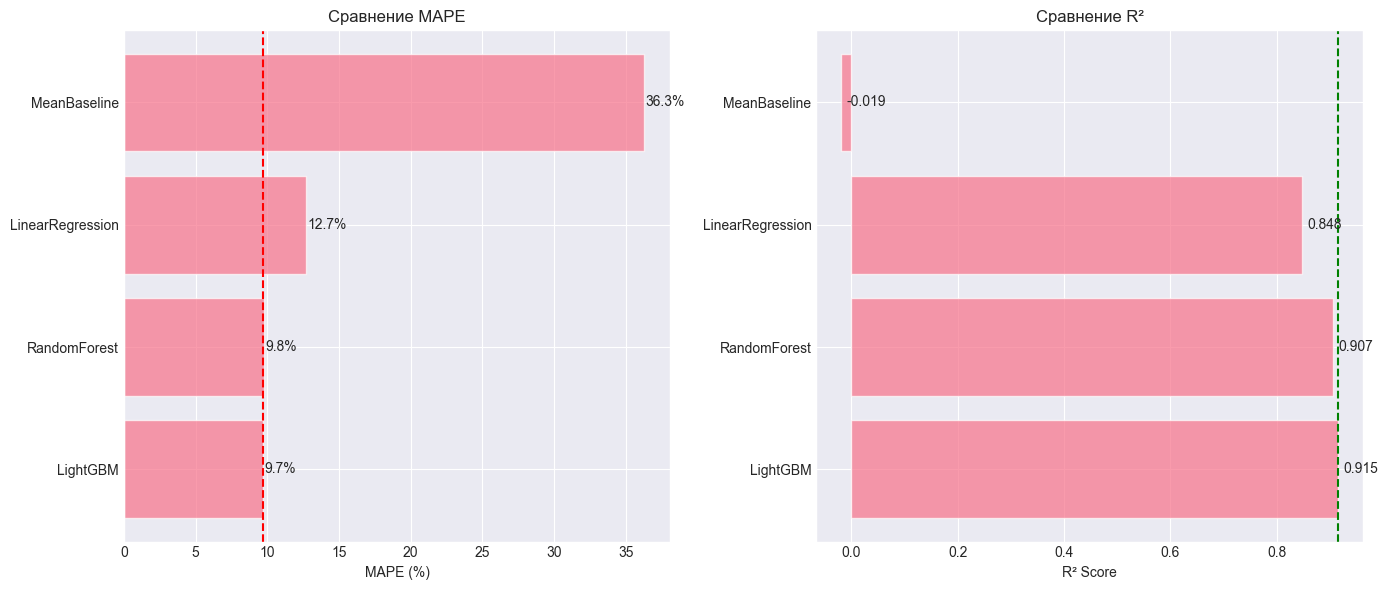

In [7]:
# 5. Визуализация сравнения
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График MAPE
bars1 = axes[0].barh(results_df["model"], results_df["MAPE"], alpha=0.7)
axes[0].set_title("Сравнение MAPE")
axes[0].set_xlabel("MAPE (%)")
axes[0].axvline(results_df["MAPE"].min(), color="red", linestyle="--")

for bar, mape in zip(bars1, results_df["MAPE"]):
    axes[0].text(mape + 0.1, bar.get_y() + bar.get_height()/2,
                f"{mape:.1f}%", va="center")

# График R²
bars2 = axes[1].barh(results_df["model"], results_df["R2"], alpha=0.7)
axes[1].set_title("Сравнение R²")
axes[1].set_xlabel("R² Score")
axes[1].axvline(results_df["R2"].max(), color="green", linestyle="--")

for bar, r2 in zip(bars2, results_df["R2"]):
    axes[1].text(r2 + 0.01, bar.get_y() + bar.get_height()/2,
                f"{r2:.3f}", va="center")

plt.tight_layout()
plt.savefig(REPORTS_PATH / "model_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
# 6. Анализ улучшений
best_baseline = results_df.iloc[0]  # Уже отсортировано по MAPE
best_overall = results_df.iloc[0]

improvement = 0
if best_baseline["model"] != best_overall["model"]:
    baseline_mape = results_df[results_df["model"] == best_baseline["model"]]["MAPE"].values[0]
    best_mape = best_overall["MAPE"]
    improvement = ((baseline_mape - best_mape) / baseline_mape) * 100

In [9]:
# 7. Выводы
print("ВЫВОДЫ")
print("="*60)

print(f"\nЛучшая модель: {best_overall["model"]}")
print(f"MAPE: {best_overall["MAPE"]:.1f}%, R²: {best_overall["R2"]:.3f}")

if improvement > 0:
    print(f"Улучшение против baseline: {improvement:.1f}%")

ВЫВОДЫ

Лучшая модель: LightGBM
MAPE: 9.7%, R²: 0.915


In [10]:
# 8. Сохранение результатов
final_results = {
    "analysis_date": datetime.now().isoformat(),
    "best_model": best_overall["model"],
    "best_mape": float(best_overall["MAPE"]),
    "best_r2": float(best_overall["R2"]),
    "all_results": results_df.to_dict("records")
}

results_path = REPORTS_PATH / "model_results.json"
with open(results_path, "w", encoding="utf-8") as f:
    json.dump(final_results, f, indent=2, ensure_ascii=False)

print(f"\nРезультаты сохранены: {results_path}")


Результаты сохранены: C:\Users\lunar\PycharmProjects\demand_forecasting\reports\model_results.json
